# Prac2

## Q1 Polynomial Regression 
先画图$f(x) = 2sin(1.5x)$  

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Quality of life function
def f(x):
    return 2*np.sin(1.5*x)

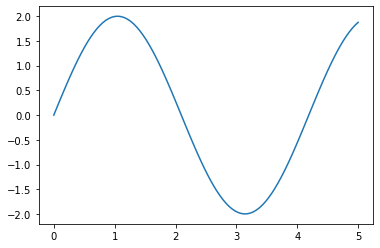

In [63]:
# Get x uniformly over the range presented in Alpaydin
x = np.linspace(0,5,100)
y = f(x)
plt.plot(x,y)

建立噪声20个噪声点,N(0,1)

In [4]:
# Sampling uniformly over the range gives stochasticity linspace doesn't have
# 使用np.random.uniform以生成随机点，0，5为下上界
x_train = np.random.uniform(0,5,size=20)
x_val = np.random.uniform(0,5,size=20)

In [5]:
noise_coeff = 1
# 在x_train和x_val的基础上使用numpy.random.normal(loc=0.0, scale=1.0, size=None)添加噪声点
y_train = f(x_train) + noise_coeff*np.random.normal(size=20)
y_val = f(x_val) + noise_coeff*np.random.normal(size=20)

20

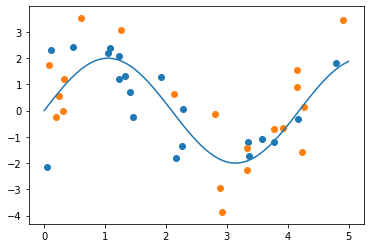

In [25]:
# Sanity check to make sure our test and train data mimic alpaydin
# 绘图，蓝色点为[x_train,y_train]，红色点为[x_val, y_val]即对每一个x_train或x_val都进行高斯分布
plt.plot(x,y)
plt.scatter(x_train,y_train)
plt.scatter(x_val, y_val)

画出拟合的多项式

(-5, 5)

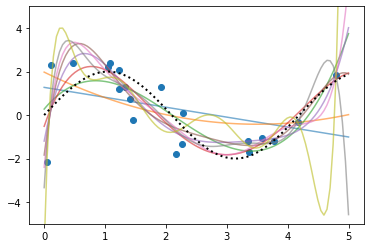

In [106]:
# Create polynomials order 1 to 9 
plt.scatter(x_train,y_train)
for i in range(1,10):
    # 得到多项式系数numpy.ndarray的z系数
    z = np.polyfit(x_train,y_train,i)
    # 根据系数z得到多项式numpy.polyld的多项式对象
    fun = np.poly1d(z)
    # 得到每个多项式对应的numpy.ndarray的y值
    yf = fun(x)
    # 根据此y值np数组列表画出对应的曲线
    plt.plot(x,yf,alpha=0.6,label='n'+str(i))
plt.plot(x,y,c='k',linestyle=':', linewidth=2)
plt.ylim([-5,5])

验证，对于每一个validation的x_val预测一个y_pred，并用y_val - y_pred得到误差，并平方。对每一次多项式的误差平方取平均，得到每一次多项式的mse

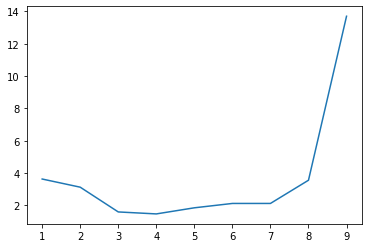

In [26]:
# Calculate the validation error
mse_list = []
for i in range(1,10):
    z = np.polyfit(x_train,y_train,i)
    fun = np.poly1d(z)
    y_pred = fun(x_val)
    y_err = y_val - y_pred
    y_err *= y_err
    mse = np.mean(y_err)
    mse_list.append(mse)
plt.plot(list(range(1,10)), mse_list)

## Q2，Q3

In [28]:
import pandas as pd

In [34]:
bh = pd.read_csv("housing.csv")
bh

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [35]:
x_bh, y_bh = bh['RM'], bh['MEDV']

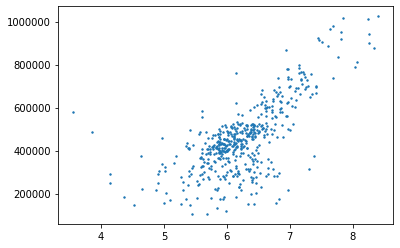

In [42]:
x = np.linspace(min(x_bh),max(x_bh),100)
plt.scatter(x_bh,y_bh,s=2)

 
1.791e+05 x - 6.633e+05
           2
5.974e+04 x - 5.696e+05 x + 1.658e+06
       3             2
-7411 x + 1.962e+05 x - 1.392e+06 x + 3.277e+06
       4             3             2
-1590 x + 3.138e+04 x - 1.523e+05 x - 2.756e+04 x + 1.319e+06
            5             4             3            2
-1.148e+04 x + 3.461e+05 x - 4.118e+06 x + 2.42e+07 x - 7.025e+07 x + 8.074e+07


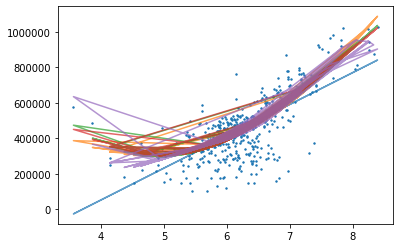

In [89]:
# Create polynomials order 1 to 9 
plt.scatter(x_bh,y_bh,s=2)
for i in range(1,6):
    z = np.polyfit(x_bh,y_bh,i)
    fun = np.poly1d(z)
    print(fun)
    yf = fun(x_bh)
    plt.plot(x_bh,yf,alpha=0.7)


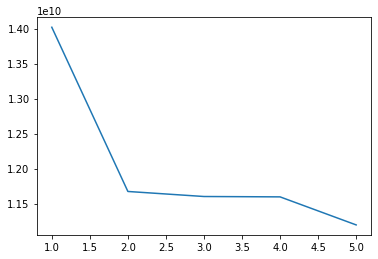

In [68]:
# Calculate the validation error
mse_list = []
for i in range(1,6):
    z = np.polyfit(x_bh,y_bh,i)
    fun = np.poly1d(z)
    y_pred = fun(x_bh)
    y_err = y_bh - y_pred
    y_err *= y_err
    mse = np.mean(y_err)
    mse_list.append(mse)
plt.plot(list(range(1,6)), mse_list)

In [81]:
x_test,x_val = x_bh[:244],x_bh[244:]
y_test,y_val = y_bh[:244],y_bh[244:]

 
2.101e+05 x - 8.257e+05
           2
3.493e+04 x - 2.468e+05 x + 6.536e+05
           3             2
-2.26e+04 x + 4.815e+05 x - 3.158e+06 x + 6.919e+06
            4             3             2
-2.483e+04 x + 6.297e+05 x - 5.887e+06 x + 2.424e+07 x - 3.688e+07
      5            4             3             2
6065 x - 2.24e+05 x + 3.228e+06 x - 2.271e+07 x + 7.833e+07 x - 1.059e+08


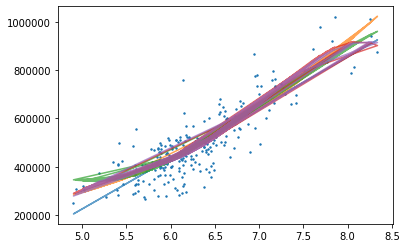

In [83]:
# Create polynomials order 1 to 9 
plt.scatter(x_test,y_test,s=2)
for i in range(1,6):
    z = np.polyfit(x_test,y_test,i)
    fun = np.poly1d(z)
    print(fun)
    yf = fun(x_test)
    plt.plot(x_test,yf,alpha=0.7)


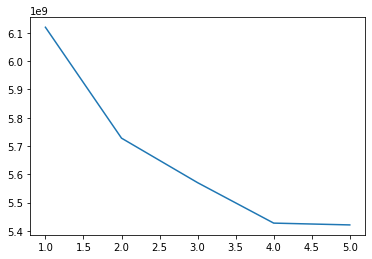

In [84]:
# Calculate the validation error
mse_list = []
for i in range(1,6):
    z = np.polyfit(x_test,y_test,i)
    fun = np.poly1d(z)
    y_pred = fun(x_test)
    y_err = y_test - y_pred
    y_err *= y_err
    mse = np.mean(y_err)
    mse_list.append(mse)
plt.plot(list(range(1,6)), mse_list)

## Q4 Parametric Probabilistic Classification
一维输入，二分类问题，高斯分布  
用Iris画似然和后验  
  
  **这其中先验图的意义在于体现高斯分布是什么样的，即给定x轴，体现出给定$C_n$，$x$所代表的这一点为$C_n$的概率。**  
  **后验图的意义在于给定$x$，体现出在此$x$下取的$C_n$的概率。**

In [97]:
class NormalPdf:
    def __init__(self,mu, std):
        self.mu = mu
        self.std = std
        
    def __call__(self,x):
        diff = (x - self.mu)*(x-self.mu)
        return 1/(np.sqrt(2*np.pi)*self.std) \
                * np.exp(-(diff/(2*self.std*self.std))) 

def generate_norm(data, labels, label):
    c = data[labels==label]
    mean = np.mean(c)
    std = np.std(c)
    # 用高斯分布来估计分布的所需条件是获取‘平均值’和‘标准差’，不管数据里面是什么分布，直接假设高斯分布形态、曲线
    return NormalPdf(mean, std)

def PPC(data, labels):
    # uniques是一个array(['Iris-setosa', 'Iris-versicolor'], dtype=object)
    uniques = np.unique(labels)
    # 当分类不是二分类时，用断言抛出异常
    assert len(uniques) == 2, 'labels are no good'
    # 用上述功能和NormalPdf类生成一个似然函数norm
    norm1 = generate_norm(data, labels, uniques[0])
    norm2 = generate_norm(data, labels, uniques[1])
    x = np.linspace(np.min(data)-4, np.max(data)+4, 500)
    plt.plot(x, norm1(x))
    plt.plot(x, norm2(x))
    plt.xlabel('x')
    plt.ylabel(r'$p(x|C_i)$')
    #assume equal priors，根据此P(C1)=P(C2)=0.5
    post1num = norm1(x)*0.5
    post2num = norm2(x)*0.5
    # 由于是二分类问题，分母为 P(x) = P(x|C1)*P(C1)+P(x|C2)*P(C2)
    denom = post1num + post2num
    post1 = post1num/denom
    post2 = post2num/denom
    plt.figure()
    plt.plot(x, post1)
    plt.plot(x, post2)
    plt.xlabel('x')
    plt.ylabel(r'$P(C_i|x)$')
    plt.show()
    

In [90]:
df= pd.read_csv('iris.txt', header=None)
# Get rid of the third vlass
df = df[df[4]!= 'Iris-virginica']

In [100]:
data = np.array(df[0])
labels = np.array(df[4])
np.unique(labels)

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

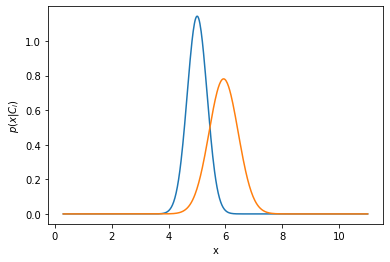

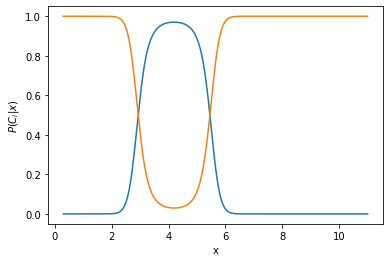

In [98]:
# generate the plots using our function
PPC(data,labels)